In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

In [9]:
# 数据导入与查看
data=pd.read_csv("./credit_risk_small_data.csv")

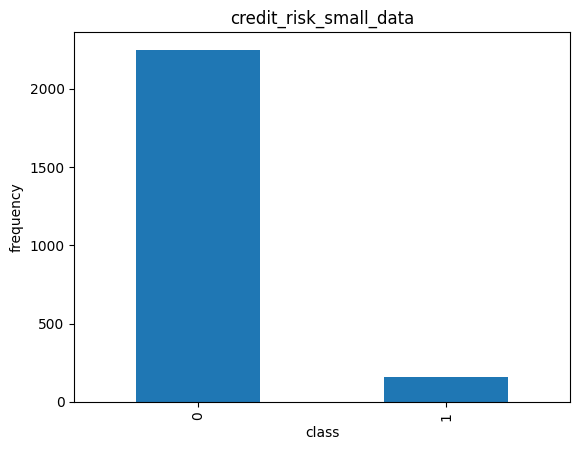

In [10]:
# 查看标签分布
count_classes = pd.value_counts(data['Delinquency'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("credit_risk_small_data")
plt.xlabel("class")
plt.ylabel("frequency")
plt.show()

In [11]:
X = data.iloc[:, data.columns != 'Delinquency']
y = data.iloc[:, data.columns == 'Delinquency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
bag_clf=BaggingClassifier(SVC(),n_estimators=10,bootstrap=True,max_samples=0.5)
bag_clf.fit(X_train, y_train)
y_pred=bag_clf.predict(X_test)

C:\Users\20450\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[0][0] 
FN = cm[0][1] 
FP = cm[1][0] 
TN = cm[1][1]
acc = (TP + TN) / (TP + FN + FP + TN)
print(bag_clf.__class__.__name__,'准确率=',acc)
sensitivity = TP / (TP + FN)
print(bag_clf.__class__.__name__,'sensitivity=',sensitivity)
specificity = TN / (TN + FP)
print(bag_clf.__class__.__name__,'specificity=',specificity)
precision=TP/(TP+FP)
print(bag_clf.__class__.__name__,'precision=',precision)
F1_score=2*precision*sensitivity/(precision+sensitivity)
print(bag_clf.__class__.__name__,'F1_score=',F1_score)
print(classification_report(y_test,y_pred ))

BaggingClassifier 准确率= 0.9230769230769231
BaggingClassifier sensitivity= 1.0
BaggingClassifier specificity= 0.0
BaggingClassifier precision= 0.9230769230769231
BaggingClassifier F1_score= 0.9600000000000001
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       444
           1       0.00      0.00      0.00        37

    accuracy                           0.92       481
   macro avg       0.46      0.50      0.48       481
weighted avg       0.85      0.92      0.89       481



C:\Users\20450\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20450\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20450\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

<Figure size 640x480 with 0 Axes>

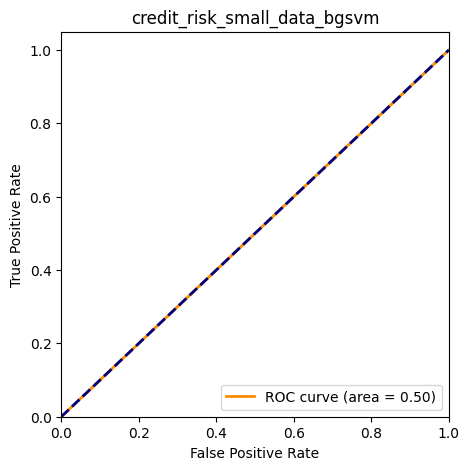

In [14]:
#ROC曲线
# 计算
fpr, tpr, thread = roc_curve(y_test, y_pred)
roc_auc= auc(fpr, tpr)
# 绘图
plt.figure()
lw = 2
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('credit_risk_small_data_bgsvm')
plt.legend(loc="lower right")
plt.show()